In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Soru 1:
* Kaggle'in 2020 yılı için üyeleriyle yaptığı anket sonuçlarını içeren ekteki "kaggle_survey_2020_responses.csv" dosyasını 2. satırı atlayarak ```survey``` adlı DataFrame'e okuyun.
* İlk sütunu silin.
* Q1, Q2, Q3, Q4, Q5 ve Q6 sütun isimlerini sırasıyla Age, Gender, Country, Education, Occupation ve Coding Experience olacak şekilde değiştirin.
* Education, Occupation ve Coding Experience sütunlarından herhangi birisisinde ```NaN``` değeri olan satırları siliniz. Kaç satır silindi?
* En son oluşan DataFrame'in satır ve sütun sayısını yazdırın.

In [28]:
survey = pd.read_csv('kaggle_survey_2020_responses.csv',skiprows=[1])
survey.drop(survey.columns[0], axis=1, inplace=True)
survey.rename(columns={"Q1": "Age", "Q2": "Gender","Q3": "Country","Q4": "Education","Q5" : "Occupation","Q6" : "CodingExperience"},inplace=True)
lenBefore=len(survey.index)
survey.dropna(subset=['Occupation', 'Education', 'CodingExperience'],inplace=True)
lenAfter=len(survey.index)
deletedRow=lenBefore-lenAfter
print("Deleted Row :" ,deletedRow)
print("After deleting process ROWS : " , len(survey.index))
print("After deleting process COLUMNS : " , len(survey.columns))


Deleted Row : 916
After deleting process ROWS :  19120
After deleting process COLUMNS :  354


## Soru 2:
Ankete katılanların yaş aralık dağılımını pasta grafiği ile gösteriniz.

array([<AxesSubplot:ylabel='None'>], dtype=object)

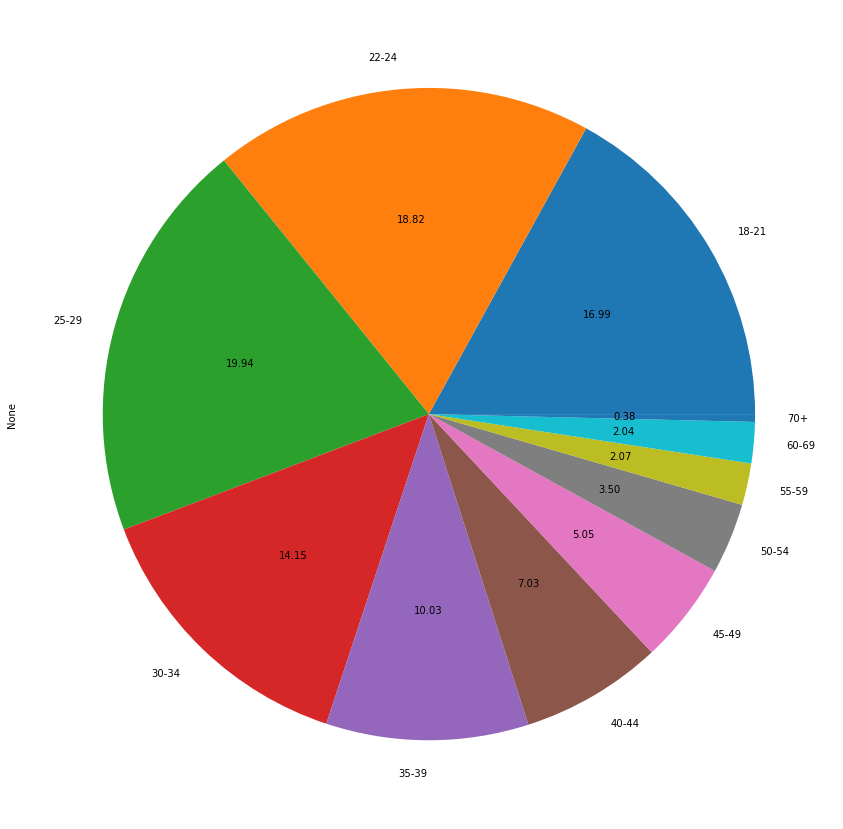

In [29]:
survey.groupby('Age').size().plot.pie(subplots=True,figsize=(15,15), autopct='%.2f', fontsize=10)

## Soru 3:
Türkiye'den ankete katılanların eğitim seviyelerine göre sayılarını listeleyiniz.

In [30]:
#survey.loc[survey["Country"] == "Turkey"].groupby(['Education'],as_index =False).size()
survey[survey.Country == "Turkey"].groupby("Education").Age.count().to_frame()

,Age
Education,
Bachelor’s degree,129
Doctoral degree,50
I prefer not to answer,8
Master’s degree,111
No formal education past high school,3
Professional degree,6
Some college/university study without earning a bachelor’s degree,15


## Soru 4:
Her bir yaş aralığı için en çok yapılan meslek ismini (```Occupation```) listeleyiniz.

In [31]:
grouped=survey.groupby(['Age']).apply(lambda x: x['Occupation'].value_counts().index[0]).to_frame()
grouped.rename(columns={0 : "Occupation Name"})

,Occupation Name
Age,
18-21,Student
22-24,Student
25-29,Student
30-34,Data Scientist
35-39,Data Scientist
40-44,Data Scientist
45-49,Other
50-54,Other
55-59,Other


## Soru 5:
* Her bir programlama dilinin kaç anket katılımcısı tarafından kullanıldığını bulup büyükten küçüğe sıralayınız.
* Her bir programlama dilinin kaç ```Data Scientist``` tarafından kullanıldığını bulup büyükten küçüğe sıralayınız. 
* Her iki sonucu aynı figürde yan yana iki alt grafik (subplot) olarak gösteriniz. Grafiklere uygun birer başlık (```title```) atayınız.

In [32]:
survey_temp = survey[survey.iloc[:, 6:19].columns]
PL=survey_temp.melt(var_name='Column Name', value_name='ProgrammingLanguage').value_counts().to_frame()
PL.rename(columns={0 : "Programming Languages Count"})

,,Programming Languages Count
Column Name,ProgrammingLanguage,
Q7_Part_1,Python,15530
Q7_Part_3,SQL,7535
Q7_Part_2,R,4277
Q7_Part_5,C++,3827
Q7_Part_6,Java,3367
Q7_Part_4,C,3315
Q7_Part_7,Javascript,2995
Q7_Part_11,MATLAB,2217
Q7_OTHER,Other,1945


In [33]:
dataScientistSeries=survey[survey.Occupation == "Data Scientist"][survey.iloc[:, 6:19].columns]
dataScientist=dataScientistSeries.melt(var_name='Column Name', value_name='ProgrammingLanguage').value_counts().to_frame()
dataScientist.rename(columns={0:"Data Scientist Number"})

,,Data Scientist Number
Column Name,ProgrammingLanguage,
Q7_Part_1,Python,2453
Q7_Part_3,SQL,1473
Q7_Part_2,R,975
Q7_Part_10,Bash,405
Q7_Part_5,C++,323
Q7_Part_6,Java,305
Q7_Part_7,Javascript,290
Q7_Part_4,C,247
Q7_OTHER,Other,245


<AxesSubplot:title={'center':' Number of Data Scientist'}, xlabel='Column Name,ProgrammingLanguage'>

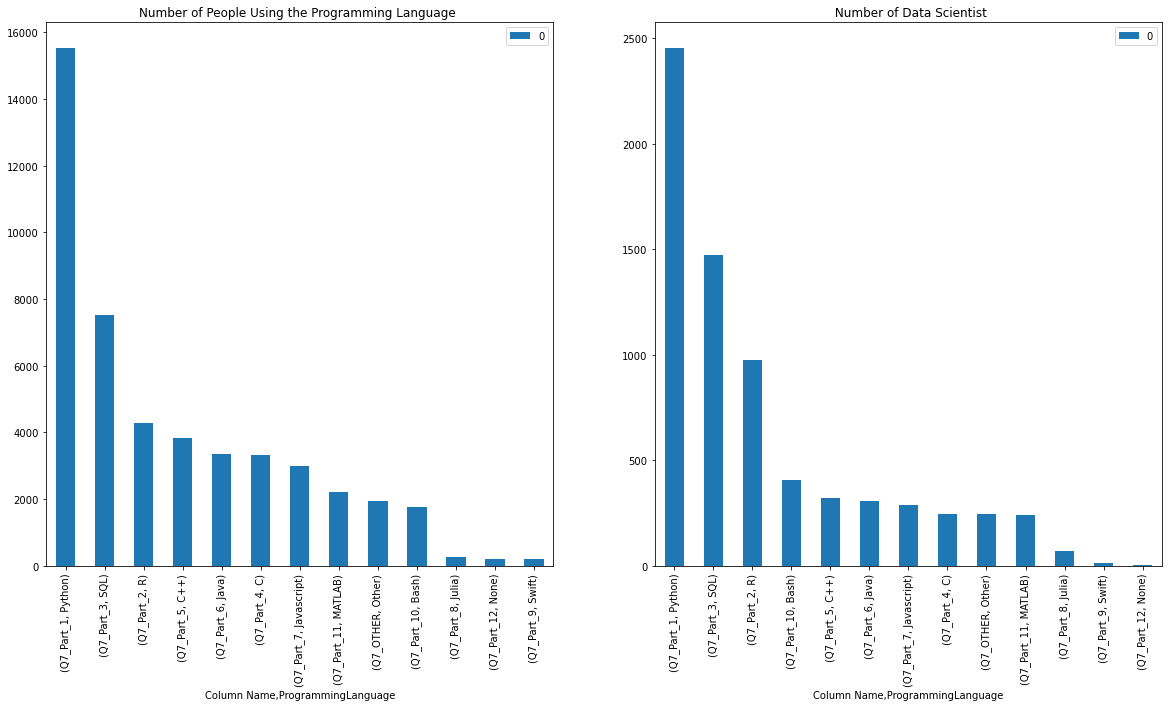

In [34]:
figure, axes = plt.subplots(1, 2, figsize=(20,10))
PL.plot.bar(ax=axes[0], title="Number of People Using the Programming Language ")
dataScientist.plot.bar(ax=axes[1], title=" Number of Data Scientist")

## Soru 6:
Yatay eksende kodlama deneyimi, dikey eksende makine öğrenmesi metotlarını kullanan ```Data Scientist``` sayısı olacak şekilde bir sütun grafiği çiziniz.

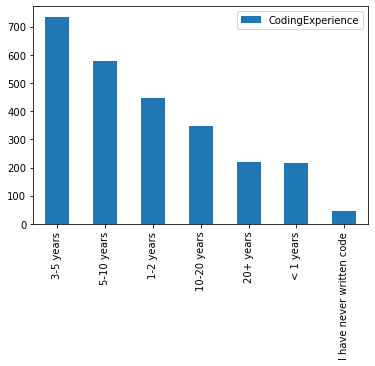

In [35]:
i =survey[survey.Q15 == "I do not use machine learning methods"].index
temp_survey = survey.drop(i)
dataScientist = temp_survey[temp_survey.Occupation == "Data Scientist"].CodingExperience.value_counts().to_frame()
ax = dataScientist.plot(kind="bar")

# Soru 7:
* Yalnızca scikit-learn framework'ünü kullananların kullandıkları makine öğrenmesi algoritmalarının kullanıcı sayılarını büyükten küçüğe listeleyiniz.
* Scikit-learn, tensorflow ve keras kütüphanelerini düzenli olarak kullanan kişi sayısı kaçtır?

In [36]:
survey["Q16_Part_1"]=survey["Q16_Part_1"].str.strip()
col = survey.iloc[:, 81:93].columns
sl = survey[survey.Q16_Part_1 =="Scikit-learn"][col]
sl.melt(var_name='Column Name', value_name='ML Algorithms').value_counts().to_frame().rename(columns={0:"Number of People"})

,,Number of People
Column Name,ML Algorithms,
Q17_Part_1,Linear or Logistic Regression,8382
Q17_Part_2,Decision Trees or Random Forests,7340
Q17_Part_7,Convolutional Neural Networks,4679
Q17_Part_3,"Gradient Boosting Machines (xgboost, lightgbm, etc)",4507
Q17_Part_4,Bayesian Approaches,2886
Q17_Part_9,Recurrent Neural Networks,2795
Q17_Part_6,"Dense Neural Networks (MLPs, etc)",2739
Q17_Part_10,"Transformer Networks (BERT, gpt-3, etc)",1064
Q17_Part_8,Generative Adversarial Networks,792


## Soru 8:
* Ortalama yıllık maaşı en yüksek olan meslek (```Occupation```) nedir? ```Data Scientist``` kaçıncı sıradadır? **Not:** Aralık olarak verilen maaşların orta noktasını maaş değeri olarak alıp ```ConvertedComp``` isimli yeni bir sütun ekleyiniz.
* ```Data Scientist``` olarak çalışanların ülke bazında ortalama yıllık maaşlarını büyükten küçüğe sıralayın, ilk 10 ülkeyi ve bu ülkelerdeki ortalama yıllık ```Data Scientist``` maaşlarını listeleyin.
* 250’den fazla kişi çalışan kurumdakilerin ortalama maaşları ne kadardır?
* Hesaplanan maaş (```ConvertedComp```) sütununu kullanarak ülke bazlı ortalama, standart sapma ve medyan değerlerinden oluşan bir dataframe oluşturun ve listeleyin. Türkiye kaçıncı sıradadır ve değeri kaçtır?

In [37]:
survey["Q24"] =survey["Q24"].replace(r'[$>]', '', regex=True).replace(r'[,]', '.', regex=True).str.strip()
df1 = survey.Q24.str.extract(r'(\d+.\d+)-(\d+.\d+)').dropna().astype(float) 
survey["ConvertedComp"]= df1.mean(axis=1)
avgOccupation = survey.groupby('Occupation').ConvertedComp.mean()
avgOccupation =avgOccupation.to_frame().sort_values(by = "ConvertedComp",ascending=False).dropna().reset_index()
avgOccupation.index+=1
avgOccupation

,Occupation,ConvertedComp
1,Product/Project Manager,68.637700
2,Data Scientist,63.939391
3,Data Engineer,55.420272
4,Other,54.280552
5,Statistician,52.978422
6,Machine Learning Engineer,51.949737
7,Research Scientist,50.209770
8,Business Analyst,45.786869
9,Software Engineer,44.746020
10,DBA/Database Engineer,43.028146


In [38]:
avgOccupation[avgOccupation.Occupation=="Data Scientist"]

,Occupation,ConvertedComp
2,Data Scientist,63.939391


In [39]:
avgCountry =  survey[survey.Occupation=="Data Scientist"].groupby('Country').ConvertedComp.mean()
avgCountry.to_frame().sort_values(by = "ConvertedComp",ascending=False).dropna().head(10)

,ConvertedComp
Country,
United States of America,146.966529
Switzerland,109.230269
United Arab Emirates,106.249500
Israel,104.476773
Australia,101.687000
United Kingdom of Great Britain and Northern Ireland,86.749500
Canada,80.504602
Ireland,78.499500
Singapore,76.937000


In [40]:
print("250’den fazla kişi çalışan kurumdakilerin ortalama maaşları : ")
survey.loc[(survey.Q20!='50-249 employees') & (survey.Q20!='0-49 employees')].ConvertedComp.mean()


250’den fazla kişi çalışan kurumdakilerin ortalama maaşları : 


59.09518810526512

In [41]:
df_avgCountry = survey.groupby("Country")['ConvertedComp'].agg(["mean","std","median"]).reset_index()
df_avgCountry.index+=1
df_avgCountry

,Country,mean,std,median
1,Argentina,22.614885,36.927639,12.4995
2,Australia,94.657901,57.217774,84.9995
3,Bangladesh,7.286537,8.107067,4.4995
4,Belarus,16.807833,17.604085,8.7495
5,Belgium,55.447776,48.744110,44.9995
6,Brazil,25.405086,35.955636,17.4995
7,Canada,78.528830,42.083512,74.9995
8,Chile,28.409877,29.077280,22.4995
9,China,34.687004,48.032926,22.4995
10,Colombia,15.685214,16.548153,8.7495


In [42]:
df_avgCountry[df_avgCountry.Country == "Turkey"]

,Country,mean,std,median
50,Turkey,19.204628,24.322603,12.4995


## Soru 9:
Lisans, yüksek lisans ve doktora mezunlarına ilişkin (ayrı ayrı); yatay eksende kodlama deneyimi (artan sırada olmalıdır), dikey eksende ortalama maaş bilgisi olacak şekilde tek bir çizgi grafiği çiziniz.

<AxesSubplot:>

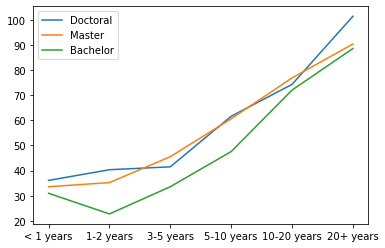

In [43]:
docDegree=survey[survey['Education']=='Doctoral degree'].groupby("CodingExperience").ConvertedComp.mean()
masterDegree=survey[survey['Education']=='Master’s degree'].groupby("CodingExperience").ConvertedComp.mean()
bachelorDegree=survey[survey['Education']=='Bachelor’s degree'].groupby("CodingExperience").ConvertedComp.mean()

dataFrameLine = pd.DataFrame({
   'Doctoral': docDegree,
   'Master': masterDegree,
    'Bachelor' : bachelorDegree
   }, index=['< 1 years', '1-2 years', '3-5 years',"5-10 years","10-20 years","20+ years"])
dataFrameLine.plot.line()


## Soru 10:
* Mesleklerdeki (```Occupation```) cinsiyet dağılımını, yatay yığılmış "stacked" sütun grafik olarak gösteriniz.
* Her meslek (```Occupation```) için kadın oranını bulup büyükten küçüğe sıralayınız.
* Şu anda çalışmayan kadın ve erkek oranlarını listeleyiniz.

<AxesSubplot:ylabel='Occupation'>

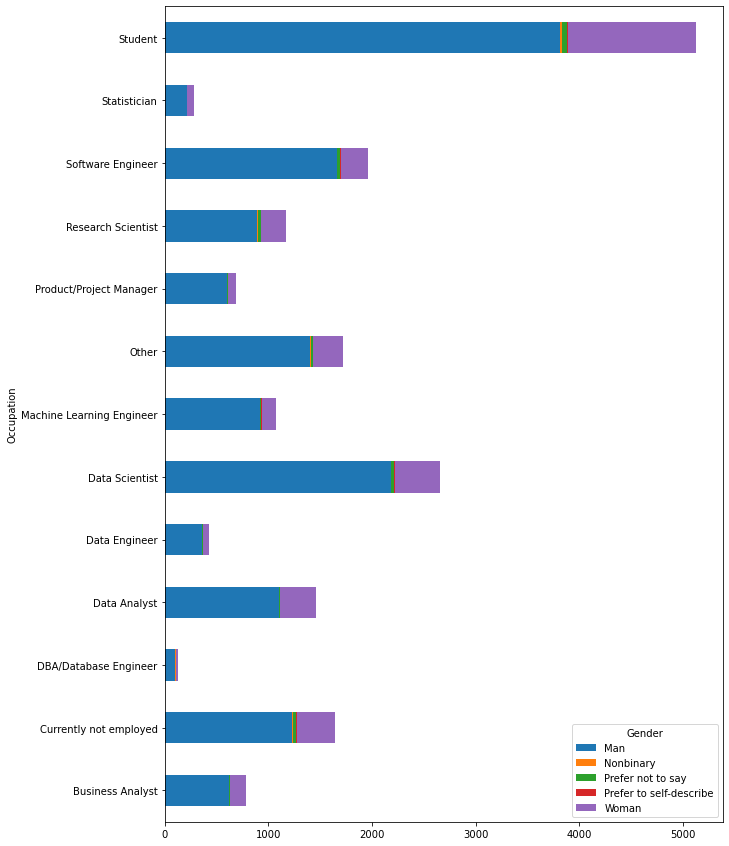

In [44]:
df = survey[["Occupation","Gender"]].groupby("Occupation").Gender.value_counts().unstack()
df.plot(kind='barh',stacked=True, figsize=(10,15))

In [45]:
womanNumber =survey[survey["Gender"]== "Woman"].Occupation.value_counts()
j =survey[survey.Gender == "Woman"].index
otherGenderSurvey = survey.drop(j)
otherGenderSum=otherGenderSurvey[["Occupation","Gender"]].Occupation.value_counts()
percent = 100* womanNumber.values/ (otherGenderSum.values + womanNumber.values)
val = pd.Series(percent, index=womanNumber.index).to_frame().rename(columns={0:"Percent of Woman"})
val["Percent of Woman"].map("{:,.2f}%".format).sort_values(ascending=False).to_frame()

,Percent of Woman
Student,24.03%
Data Engineer,21.51%
Research Scientist,20.22%
Data Analyst,19.33%
Software Engineer,18.92%
Other,18.51%
Currently not employed,18.00%
Machine Learning Engineer,17.56%
Data Scientist,16.43%
Statistician,15.45%


In [65]:
notWorkingWomanPercent =100* ( womanNumber.loc['Currently not employed']) / (survey[survey["Gender"]== "Woman"].Gender.value_counts())
notWorkingMan =otherGenderSurvey[otherGenderSurvey.Gender == "Man"].Occupation.value_counts().loc['Currently not employed']
notWorkingManPercent = 100* (notWorkingMan) / (survey[survey["Gender"]== "Man"].Gender.value_counts())
d = {'Not Employed Women Percent ':notWorkingWomanPercent , 'Not Employed Man Percent': notWorkingManPercent}
pd.DataFrame(data=d).unstack().dropna().to_frame()

,,0
Not Employed Women Percent,Woman,10.135870
Not Employed Man Percent,Man,8.152858


## Soru 11:

Ankete katılan kadınlardan ortalama çalışma süresi 3 yılın üzerinde olanlar için:
* Kadın katılımcı sayısının en yüksek olduğu ülke hangisidir?
* Türkiye'den ankete katılan kadınların eğitim durumlarını pasta grafiğinde gösteriniz.

In [47]:
survey["CodingExperience"]=survey["CodingExperience"].str.strip()
experience = survey[ ((survey['CodingExperience']=='< 1 years') |
                                          (survey['CodingExperience']=='1-2 years') | 
                                          (survey['CodingExperience']=='I have never written code'))].index
frame = survey.drop(experience)
print("Kadın katılımcı sayısının en yüksek olduğu ülke : ")
frame[frame.Gender == "Woman"].Country.value_counts().to_frame().head(1)


Kadın katılımcı sayısının en yüksek olduğu ülke : 


,Country
India,480


<AxesSubplot:title={'center':"Türkiye'den ankete katılan kadınların eğitim durumları"}, ylabel='None'>

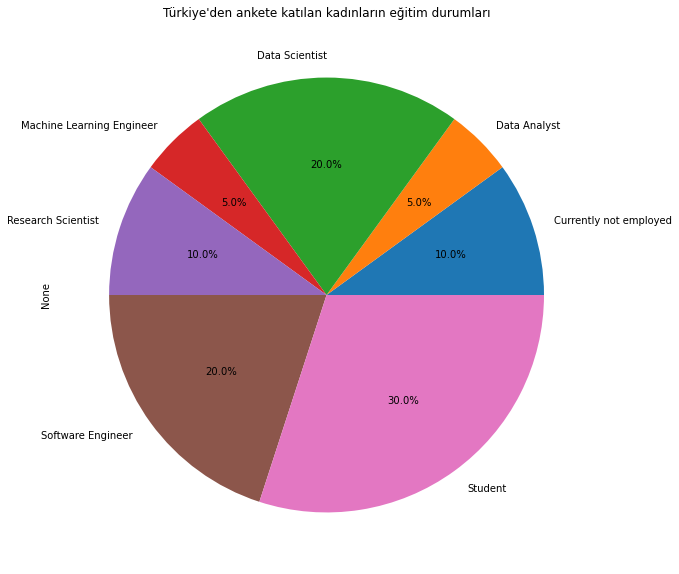

In [48]:
f1 = frame[["Gender","Country","Occupation"]][frame.Gender== "Woman"]
f1.loc[frame.Country== "Turkey"].groupby("Occupation").size().plot.pie(title="Türkiye'den ankete katılan kadınların eğitim durumları",autopct='%1.1f%%',figsize=(15,10))

## Soru 12:
* 39. soru ile ilgili sütunlarda yer alan değerlerdeki parantez içi ifadeleri siliniz.
* 18-21 yaş aralığında olan katılımcıların favori sosyal medya platformu nedir?

In [49]:
survey.iloc[:,243:255]= survey.iloc[:,243:255].replace(to_replace="\([^)]*\)", value='', regex=True)
survey.iloc[:,243:255]

,Q39_Part_1,Q39_Part_2,Q39_Part_3,Q39_Part_4,Q39_Part_5,Q39_Part_6,Q39_Part_7,Q39_Part_8,Q39_Part_9,Q39_Part_10,Q39_Part_11,Q39_OTHER
0,NaN,NaN,NaN,Kaggle,NaN,NaN,NaN,NaN,Journal Publications,NaN,NaN,NaN
1,Twitter,NaN,Reddit,Kaggle,Course Forums,YouTube,NaN,Blogs,NaN,Slack Communities,NaN,NaN
2,NaN,Email newsletters,NaN,Kaggle,NaN,YouTube,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
20029,NaN,NaN,NaN,NaN,NaN,YouTube,NaN,NaN,NaN,NaN,NaN,NaN
20032,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
20033,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20034,Twitter,NaN,NaN,Kaggle,NaN,YouTube,NaN,Blogs,NaN,NaN,NaN,NaN


In [50]:
socialMedia = survey[survey.Age =="18-21"][survey.iloc[:,243:255].columns]
print("18-21 yaş aralığında olan katılımcıların favori sosyal medya platformu:")
socialMedia.melt(var_name='column', value_name='value').value_counts().to_frame().rename(columns={0: 'Counts'}).head(1)

18-21 yaş aralığında olan katılımcıların favori sosyal medya platformu:


,,Counts
column,value,
Q39_Part_4,Kaggle,1062


## Soru 13:
* https://download.geonames.org/export/dump/countryInfo.txt adresindeki veriyi:
    * ilk 49 satırını ihmal ederek
    * yalnızca ```#ISO, Country, neighbours``` sütunlarını kullanarak 
    * ```Country``` sütununu indeks sütun olarak  
    
okuyarak __country_info__ adlı DataFrame'e aktarınız.
* ```#ISO``` sütununun ismini ```Country Code``` olarak değiştiriniz.
* ```survey``` ve ```country_info``` adlı DataFrame'leri ülke bazında birleştirip ```merged_survey``` adında yeni bir dataframe'e aktarınız.

In [55]:
country_info = pd.read_csv('https://download.geonames.org/export/dump/countryInfo.txt', skiprows=49,sep='\t',index_col ="Country",usecols=['#ISO', 'Country','neighbours'])
country_info.rename(columns={"#ISO": "Country Code"},inplace=True)
country_info

,Country Code,neighbours
Country,,
Andorra,AD,"ES,FR"
United Arab Emirates,AE,"SA,OM"
Afghanistan,AF,"TM,CN,IR,TJ,PK,UZ"
Antigua and Barbuda,AG,NaN
Anguilla,AI,NaN
...,...,...
South Africa,ZA,"ZW,SZ,MZ,BW,NA,LS"
Zambia,ZM,"ZW,TZ,MZ,CD,NA,MW,AO"
Zimbabwe,ZW,"ZA,MZ,BW,ZM"


In [56]:
merged_survey = pd.merge(survey, country_info, on='Country')
merged_survey.Country.value_counts().to_frame()

,Country
India,5596
Brazil,659
Japan,570
Russia,549
Nigeria,472
China,415
Germany,383
Spain,324
Turkey,322
France,313


## Soru 14:
Almanya ve komşu ülkeleri için ankete katılanlardan doktoralıların ülke bazında yüzdelerini, ülke isimlerine göre alfabetik sırada listeleyiniz.

In [59]:
neighbour = merged_survey[merged_survey.Country == "Germany"]["neighbours"].iloc[0].split(",")
neighbour.append('DE')
doctoralPercent=merged_survey.loc[(merged_survey['Country Code'].isin(neighbour)==True)& (merged_survey['Education']=='Doctoral degree')].groupby(["Country"],as_index=False).size()
sumsCountry=doctoralPercent['size'].sum()
doctoralPercent['Percent of Doctoral']=round(100 * doctoralPercent['size'] / sumsCountry , 1).map("{:,.2f}%".format)
doctoralPercent

,Country,size,Percent of Doctoral
0,Belgium,13,5.10%
1,France,75,29.50%
2,Germany,99,39.00%
3,Netherlands,23,9.10%
4,Poland,22,8.70%
5,Switzerland,22,8.70%
